In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

$$
E(x) = (x_{0} + x_{1} - 2)^{2} + x_{0}^{2} + x_{0}^4
$$

$$
\nabla E(x) = 
\begin{bmatrix}
\frac{\partial E}{\partial x_{0}} \\
\frac{\partial E}{\partial x_{1}}
\end{bmatrix}
= 
\begin{bmatrix}
4x_{0}^{3} + 2x_{0} + 2(x_{0} + x_{1} - 2) \\
2(x_{0} + x_{1} - 2)
\end{bmatrix}
$$

$$
H(x) = 
\begin{bmatrix}
\frac{\partial^{2} E}{\partial x_{0}^2} & \frac{\partial^{2} E}{\partial x_{0}x_{1}} \\
\frac{\partial^{2} E}{\partial x_{1}x_{0}} & \frac{\partial^{2} E}{\partial^{2} x_{1}^2}
\end{bmatrix}
= 
\begin{bmatrix}
12x_{0}^{2} + 4 & 2 \\
2 & 2
\end{bmatrix}
$$

In [2]:
### We define the energy function and its corresponding gradient and hessian functions.
def energy (x):
  return (x[0] + x[1] - 2)**2 + x[0]**2 + x[0]**4

def gradient (x):
  return np.array([
      4*x[0]**3 + 2*x[0] + 2*(x[0]+x[1]-2),
      2*(x[0]+x[1]-2)
    ])

def hessian (x):
  return np.array([
      [12*x[0]**2 + 4, 2],
      [2, 2]
  ])

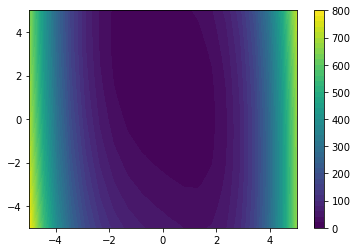

In [3]:
### We can visualize this energy function by sampling a few points and evaluating the energy function at these points
N = 20
X, Y = np.meshgrid(np.linspace(-5, 5, N), np.linspace(-5, 5, N))
x = np.stack([X.flatten(), Y.flatten()], axis=0)

# plt.tricontourf(x[0], x[1], np.minimum(energy(x), 100), levels=10)
plt.tricontourf(x[0], x[1], energy(x), levels=50)
plt.colorbar()

In [5]:
### Newton iteration
initialGuess = np.array([3., -2.]) # np.random.rand(2)
x = initialGuess
xHist = [copy.copy(x)]

MAX_ITER = 100
for i in range(MAX_ITER):
  print(f"Current x: [{x[0]:.4f}, {x[1]:.4f}]")

  H = hessian(x)
  J = gradient(x)
  dx = -np.linalg.inv(H) @ J
  x += dx

  xHist.append(copy.copy(x))

  if np.linalg.norm(dx) < 1e-15:
    print(f"Tolerance reached dx: {np.linalg.norm(dx):.4e}")
    break

print(f"Final x: {x}")
xHist = np.stack(xHist)

Current x: [3.0000, -2.0000]
Current x: [1.9636, 0.0364]
Current x: [1.2549, 0.7451]
Current x: [0.7565, 1.2435]
Current x: [0.3906, 1.6094]
Current x: [0.1244, 1.8756]
Current x: [0.0071, 1.9929]
Current x: [0.0000, 2.0000]
Current x: [0.0000, 2.0000]
Tolerance reached dx: 1.5611e-17
Final x: [0. 2.]


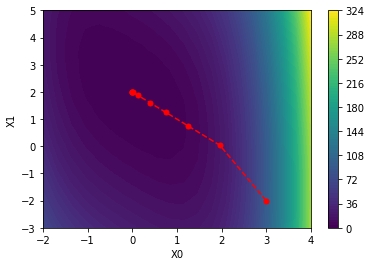

In [6]:
### We can visualize this energy function by sampling a few points and evaluating the energy function at these points
N = 20
X, Y = np.meshgrid(np.linspace(-2, 4, N), np.linspace(-3, 5, N))
x = np.stack([X.flatten(), Y.flatten()], axis=0)

plt.tricontourf(x[0], x[1], energy(x), levels=100)
# plt.scatter(xHist[:,0], xHist[:,1])
plt.plot(xHist[:,0], xHist[:,1], marker='o', markersize=5, linestyle='--', c='r')
plt.xlabel("X0")
plt.ylabel("X1")
plt.colorbar()